<a href="https://colab.research.google.com/github/juniaufmg/previsao_0_casos/blob/main/Tratativa_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Para este trabalho foi adquirido a versão Pro do Google Colab devido a densidade de dados do Dataset escolhido
#Bibliotecas necessarias para o trabalho
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Dados de Vacina em MG

url1 = "https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-08-23/uf%3DMG/part-00000-2546f38a-03f0-4941-91dc-7d453e513de8.c000.csv"
dataVacina = pd.read_csv(url1,  error_bad_lines=False, sep=';')
dataVacina.head()

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,96cfe5b5-77af-481f-b8ef-52c861fc31fd-i0b0,1aa12b993e2f98b60737a0ce00e1844eadd7ac96a7358c...,56.0,1965-02-06,M,1.0,BRANCA,310620.0,10.0,BELO HORIZONTE,BRASIL,MG,31840.0,B,23175,MUNICIPIO DE BELO HORIZONTE,CENTRO DE SAUDE GENTIL GOMES,310620,BELO HORIZONTE,MG,106,Doenças Cardiovasculares e Cerebrovasculares,1.0,Comorbidades,EX2405,MINISTERIO DA SAUDE,Organization/00394544000851,2021-05-11,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,Novo PNI,2021-05-11T12:46:17.000Z,16341
1,a912c0ef-3aa9-40f3-ad28-e9cf7d53787f-i0b0,143c613054c3ebbd2f8cda9deba4e7f7eaa628ef7a3cfd...,41.0,1979-04-25,M,99.0,SEM INFORMACAO,314800.0,10.0,PATOS DE MINAS,BRASIL,MG,38702.0,B,2726726,FUNDACAO HOSPITALAR DO ESTADO DE MINAS GERAIS,HOSPITAL REGIONAL ANTONIO DIAS,314800,PATOS DE MINAS,MG,909,Fisioterapeutas,9.0,Trabalhadores de Saúde,4120Z005,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-02-22,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-07-06T18:01:24.000Z,16341
2,33ea6c6e-7407-46a4-9096-a7c86408ed45-i0b0,83c8a1070e2887f12bfcefb0a8b84ba336a59a24aa4a8e...,40.0,1981-02-12,M,99.0,SEM INFORMACAO,311860.0,10.0,CONTAGEM,BRASIL,MG,32230.0,B,7301189,MUNICIPIO DE CONTAGEM,UNIDADE BASICA DE SAUDE AMAZONAS,311860,CONTAGEM,MG,107,Hipertensão de difícil controle ou com complic...,1.0,Comorbidades,ABX0528,MINISTERIO DA SAUDE,Organization/00394544000851,2021-06-02,1ª Dose,89,Covid-19-AstraZeneca,Novo PNI,2021-06-11T17:39:11.000Z,16341
3,1b3b3cc8-c078-4d5c-8d0a-63655741d172-i0b0,6f4613a8a4257d331cda5065833fe110b1f3f7ee3dd740...,62.0,1958-12-13,F,3.0,PARDA,311940.0,10.0,CORONEL FABRICIANO,BRASIL,MG,35170.0,B,2140845,PREFEITURA MUNICIPAL DE CORONEL FABRICIANO,UNIDADE DO SAUDE BOM JESUS,311940,CORONEL FABRICIANO,MG,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,214VCD088W,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-15,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-28T19:42:40.000Z,16341
4,3ddf5af8-6f9c-44d5-891e-c7b980efe6c6-i0b0,0fd761c6a86dc9800f6bc61b1e656d083ba431ac6c0a0a...,58.0,1962-09-21,F,3.0,PARDA,314090.0,10.0,MATIPO,BRASIL,MG,35367.0,B,2114992,PREFEITURA MUNICIPAL DE MATIPO,CENTRO DE SAUDE DE MATIPO,314090,MATIPO,MG,107,Hipertensão de difícil controle ou com complic...,1.0,Comorbidades,212VCD001ZVA,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-21,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-21T16:20:19.000Z,16341


In [ ]:
#tratamento 1: separando doses por data
dt1=dataVacina.loc[dataVacina['estabelecimento_uf'] == 'MG', ['vacina_descricao_dose' , 'vacina_dataaplicacao']]

dt1.head()

,vacina_descricao_dose,vacina_dataaplicacao
0,1ª Dose,2021-05-11
1,1ª Dose,2021-02-22
2,1ª Dose,2021-06-02
3,1ª Dose,2021-05-15
4,1ª Dose,2021-05-21


In [ ]:
#criando uma coluna de 1 para ser somada depois. Somaremos 1, pois é a quantidade de vacina dada por linha
dt1.insert(0,'quant',1)
dt1.head()

,quant,vacina_descricao_dose,vacina_dataaplicacao
0,1,1ª Dose,2021-05-11
1,1,1ª Dose,2021-02-22
2,1,1ª Dose,2021-06-02
3,1,1ª Dose,2021-05-15
4,1,1ª Dose,2021-05-21


In [ ]:
#tratamento 2: Separando as segundas doses (datas erradas seram excluidas da nossa analise)
dt1 = dt1.groupby(['vacina_dataaplicacao', 'vacina_descricao_dose'])['quant'].sum().reset_index()
dt1.head()

,vacina_dataaplicacao,vacina_descricao_dose,quant
0,1937-01-25,2ª Dose,1
1,1938-01-05,2ª Dose,1
2,1952-10-02,2ª Dose,1
3,1957-04-06,2ª Dose,1
4,1957-10-02,2ª Dose,1


Determinar o periodo de exibição da planilha

In [ ]:
#Determinando Periodo de analise que será de 12-03 até 22-08
dt1=dt1.loc[(dt1['vacina_dataaplicacao']>'2021-03-12') & (dt1['vacina_dataaplicacao']<'2021-08-22')]
#ordenar por data
dt1=dt1.sort_values(by='vacina_dataaplicacao')
dt1

,vacina_dataaplicacao,vacina_descricao_dose,quant
180,2021-03-13,1ª Dose,7468
181,2021-03-13,2ª Dose,641
182,2021-03-13,Dose,1
183,2021-03-14,1ª Dose,1486
184,2021-03-14,2ª Dose,197
...,...,...,...
654,2021-08-20,1ª Dose,50380
656,2021-08-20,Dose,68
658,2021-08-21,2ª Dose,5175
657,2021-08-21,1ª Dose,38607


In [ ]:
dt1['dose'], dt1['lixo'] = dt1['vacina_descricao_dose'].str.split('ª', 1).str
#Obtendo apenas o campo data
del dt1['vacina_descricao_dose']
del dt1['lixo']
dt1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,vacina_dataaplicacao,quant,dose
180,2021-03-13,7468,1
181,2021-03-13,641,2
182,2021-03-13,1,Dose
183,2021-03-14,1486,1
184,2021-03-14,197,2


In [ ]:
dtDose1=dt1.loc[dt1['dose'] == '1', ['quant' , 'vacina_dataaplicacao']]
dtDose2=dt1.loc[dt1['dose'] == '2', ['quant' , 'vacina_dataaplicacao']]
dtDose1 = dtDose1.rename(columns={"vacina_dataaplicacao": "data"})
dtDose2 = dtDose2.rename(columns={"vacina_dataaplicacao": "data"})
dtDose1 = dtDose1.rename(columns={"quant": "quant1"})
dtDose2 = dtDose2.rename(columns={"quant": "quant2"})



#tratando o formato data
dtDose1['data']=pd.to_datetime(dtDose1['data'])
dtDose2['data']=pd.to_datetime(dtDose2['data'])




dtDose1.head()
dtDose2.head()


,quant2,data
181,641,2021-03-13
184,197,2021-03-14
186,4793,2021-03-15
189,4445,2021-03-16
191,5738,2021-03-17


In [ ]:
#Fazer combinação dos dados dos datasets
df2=dtDose2.merge(dtDose1,on='data')
df2

,quant2,data,quant1
0,641,2021-03-13,7468
1,197,2021-03-14,1486
2,4793,2021-03-15,19403
3,4445,2021-03-16,49787
4,5738,2021-03-17,43039
...,...,...,...
159,47240,2021-08-17,86499
160,51504,2021-08-18,84450
161,32786,2021-08-19,98928
162,34986,2021-08-20,50380



Fazer downloads da tabela



In [ ]:
from google.colab import files
df2.to_csv('filename.csv') 
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Tratando o segundo dado de ocupação de leitos

In [ ]:
#Dados de Ocupação de Leitos 
url = "https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/Leitos/2021-08-22/esus-vepi.LeitoOcupacao.csv"
data = pd.read_csv(url)
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
0,p5Ez41Zu6B,2020-04-14T03:00:00.000Z,2303167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,aplicacao-web,_User$auVMjEVEVz,Santa Catarina,Itapema,Santa Catarina,Itapema,True,False,2020-04-15T13:44:30.085Z,2020-04-16T13:56:13.656Z
1,eUOMsSt7T7,2020-04-15T03:00:00.000Z,5935377\t,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,parse-cloud,_User$WBa5nfe9P9,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,False,False,2020-04-15T13:50:47.256Z,2020-08-01T20:08:13.116Z
2,QaG4oIBrMa,2020-04-15T14:57:16.255Z,0012599,15.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,parse-cloud,_User$6oxZQHBPQ7,Rio de Janeiro,Niterói,Rio de Janeiro,Niterói,False,False,2020-04-15T15:20:57.033Z,2020-08-01T20:02:12.729Z
3,ifya31F3ZF,2020-03-24T03:00:00.000Z,2562871,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,parse-cloud,_User$fhufIbmR9C,Ceará,Várzea Alegre,Ceará,Várzea Alegre,False,False,2020-04-15T16:58:32.839Z,2020-08-01T21:40:37.624Z
4,dkurDhelx9,2020-04-01T03:00:00.000Z,2252228,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,parse-cloud,_User$tkAdHTNhC9,Rio Grande do Sul,Encantado,Rio Grande do Sul,Encantado,False,False,2020-04-15T17:02:53.877Z,2020-08-01T21:37:53.664Z


In [ ]:
#Tratando os dados: salvando o novo arquivo com os dados necessarios
dt=data.loc[data['estado'] == 'Minas Gerais', ['dataNotificacao', 'ocupacaoConfirmadoCli', 'ocupacaoConfirmadoUti']]

#Tratando a coluna dataNotificacao que esta com data e horario.
dt['data'], dt['hora'] = data['dataNotificacao'].str.split('T', 1).str

#Obtendo apenas o campo data
del dt['hora']
del dt['dataNotificacao']
dt['data']=pd.to_datetime(dt['data'])

dt.head()
#datanew = pd.DataFrame()
#datanew=data.loc
#dt['data']=str(dt['dataNotificacao']).split('T')[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """


,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,data
57,0.0,0.0,2020-04-21
58,0.0,1.0,2020-04-15
65,0.0,0.0,2020-04-01
66,0.0,0.0,2020-04-02
69,0.0,0.0,2020-04-15


In [ ]:
#agrupando por data: somando as informações de uma mesma data para saber o numero de vacinação em um mesmo dia
dt = dt.groupby(['data'])['ocupacaoConfirmadoCli', 'ocupacaoConfirmadoUti'].sum().reset_index()
dt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,data,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti
0,1983-11-17,2.0,0.0
1,1984-08-09,3.0,0.0
2,1996-06-16,0.0,0.0
3,1997-10-25,3.0,0.0
4,2000-07-17,0.0,0.0
...,...,...,...
603,2021-08-18,1027.0,1020.0
604,2021-08-19,965.0,955.0
605,2021-08-20,944.0,886.0
606,2021-08-21,637.0,501.0


In [ ]:
#Determinando Periodo de analise que será de 12-03 até 22-08
dt=dt.loc[(dt['data']>'2021-03-12') & (dt['data']<'2021-08-22')]
#ordenar por data
dt=dt.sort_values(by='data')
dt

,data,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti
445,2021-03-13,2801.0,1999.0
446,2021-03-14,2899.0,2019.0
447,2021-03-15,3738.0,2480.0
448,2021-03-16,4043.0,2525.0
449,2021-03-17,4105.0,2588.0
...,...,...,...
602,2021-08-17,1016.0,1038.0
603,2021-08-18,1027.0,1020.0
604,2021-08-19,965.0,955.0
605,2021-08-20,944.0,886.0


In [ ]:
#soma acumulativa das vacinas
#df1=dtDose1.merge(dtDose2,on='data')
#df1['quant1']=df1['quant1'].cumsum()
#df1['quant2']=df1['quant2'].cumsum()
#df1

In [ ]:
#Fazer combinação dos dados dos datasets
dff=dt.merge(df2,on='data')
dff

,data,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,quant2,quant1
0,2021-03-13,2801.0,1999.0,641,7468
1,2021-03-14,2899.0,2019.0,197,1486
2,2021-03-15,3738.0,2480.0,4793,19403
3,2021-03-16,4043.0,2525.0,4445,49787
4,2021-03-17,4105.0,2588.0,5738,43039
...,...,...,...,...,...
159,2021-08-17,1016.0,1038.0,47240,86499
160,2021-08-18,1027.0,1020.0,51504,84450
161,2021-08-19,965.0,955.0,32786,98928
162,2021-08-20,944.0,886.0,34986,50380


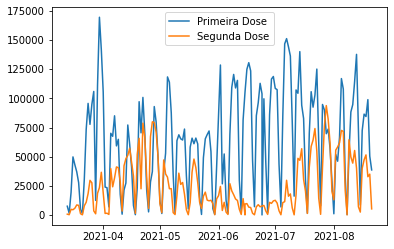

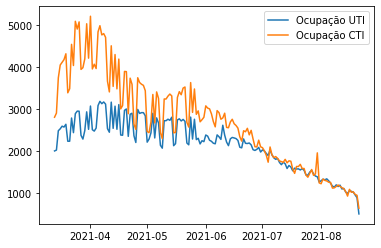

In [ ]:
#plotando grafico para conhecer os dados
x=dff['data']
y=dff['quant1']
plt.plot(x,y, label='Primeira Dose')

x=dff['data']
y=dff['quant2']
plt.plot(x,y,label='Segunda Dose')
plt.legend()

plt.show()

x=dff['data']
y=dff['ocupacaoConfirmadoUti']
plt.plot(x,y, label='Ocupação UTI')

x=dff['data']
y=dff['ocupacaoConfirmadoCli']
plt.plot(x,y, label = 'Ocupação CTI')

plt.legend()

plt.show()

#

#Iniciando o Treinamento dos Dados para predição
